# [MAXIMUM SMOOTHED LIKELIHOOD ESTIMATION; E. L. Ionides 2005](https://www3.stat.sinica.edu.tw/statistica/oldpdf/A15n49.pdf)

In [1]:
import numpy
import random
import pandas
import matplotlib.pyplot as plt
%matplotlib


Using matplotlib backend: MacOSX


# Paper (Maximum Smoothed Likelihood Estimation; E. L. Ionides; 2005) 

In [3]:
from scipy.stats import expon

In [88]:
def spectrum_generator(theta_nul, nu, omega, h, sample_size = 10):

    intensity_list      = []
    nu_given_theta_list = []
    for frequency in nu:
        denominator      = 1 + ((frequency - theta_nul)/omega)**2
        f_nu_given_theta = 1 + h/denominator
        
        expon_rand_var   = expon.rvs(size = 1)
        
        intens           = f_nu_given_theta * expon_rand_var
        
        intensity_list.append(intens)
        nu_given_theta_list.append(f_nu_given_theta)
        
    return numpy.array(intensity_list), numpy.array(nu_given_theta_list)

In [104]:
theta_nul = 0.25
nu        = numpy.linspace(0, 0.5, 200).astype("float32")
omega     = 0.05
h         = 4.0

In [139]:
intensity, frequn_given_theta = spectrum_generator(theta_nul, nu, omega, h, nu.size)

# Plotting the generated spectrum (Figure 1-a)
Note the generated spectrum is one realization of the random process that creates this spectrum. So every run of the spectrum-generator function will result in a unique realization of the spectrum. This means that the results below will be different from that of the paper (figure 1; left panel).

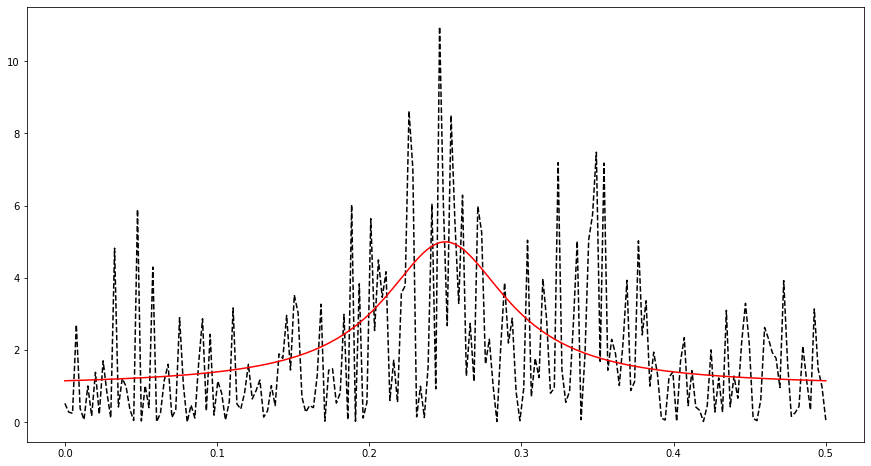

In [140]:
fig, ax = plt.subplots(1, 1, figsize = (15, 8))
ax.plot(nu, intensity, "k--")
ax.plot(nu, frequn_given_theta, "r-")